# Dynamic programming

Dynamic programming is similar to the divide and conquer approach except that the subproblems overlap i.e. the subproblems share the same subsubproblems. This method of solving problems typically is used in optimization problems, particularly optimal control problems, and was originally developed by Richard E. Bellman who is also famous for developing the closely related Bellman equation which is at the core of reinforcement learning {cite:p}`sutton2018reinforcement`.

The key strategy is to store the solutions, in a hashtable for example, to the subproblems and then reuse the solution later if the same subproblem is encountered rather than recomputing the solution {cite:p}`cormen2022introduction`. Computing the $n$-th Fibonacci number is a common example problem that illustrates this.

## Rod cutting

Let's go over the first example of an application of dynamic programming from {cite:p}`cormen2022introduction`.

Suppose we have a rod of length $n \in \mathbb{Z^+}$ and we can sell the rod for a price $p_n$ which is the cash we get for selling a rod of length $n$. We can *also* cut the rod into $k$ parts of integer length $c_i$ such that (obviously)

$$
\begin{align*}
n = c_1 + c_2 + \dots + c_k \quad \text{where $c_i \in \mathbb{Z^+}$}
\end{align*}
$$

and sell each part for the revenue $r_n = p_{c_1} + p_{c_2} + \dots + p_{c_k}$ where again $p_{c_i}$ is the cash we get for selling a rod of integer length $c_i$. The caveat here is that there maybe certain ways to cut the rod such that we actually get more profit by selling the individually cut pieces instead of selling the uncut rod. 
Clearly this depends on the pricing for each length of rod.  Can we devise an algorithm that, given the length $n$ of the rod along with the prices $p_1, p_2,\dots, p_n$ for selling a rod of length $1, 2, \dots, n$ respectively, finds an (as there could be more than one I think) optimal way of cutting the rod such that we net the highest revenue?

### Mathematical reasoning for solution

Suppose that an optimal way of cutting the rod (optimal integer decomposition of $n$) cuts the rod into $k$ pieces for some integer $1 \leq k \leq n$. We denote this optimal decomposition as

$$
n_{\text{opt}} = c_1 + c_2 + \dots + c_k
$$

where $c_i$ is the length of the $i$-th segment of the rod. The corresponding optimal revenue is thus

$$
r_{n_{\text{opt}}} = p_{c_1} + p_{c_2} + \dots + p_{c_k}.
$$

In general we can write the optimal revenue $r_{n_{\text{opt}}}$ in terms of optimal revenues for rods of shorter length

$$
r_{n_{\text{opt}}} = \max\left(p_n, r_{1_{\text{opt}}} + r_{(n-1)_{\text{opt}}}, r_{2_{\text{opt}}} + r_{(n-2)_{\text{opt}}}, \dots, r_{(n-1)_{\text{opt}}} + r_{1_{\text{opt}}} \right)
$$

where $p_n$ is the revenue gained from selling the uncut rod of length $n$. The other $n-1$ arguments to $\max$ correspond to the revenue gained from cutting the rod into two pieces of size $i$ and $n-i$ respectively $\forall i \in \{1,2,\dots,n-1\}$ and then optimally cutting up the two resulting pieces of the rod further.

If you think about it it makes sense that the optimal solution for this problem can be achieved by combining optimal solutions of smaller problems. Specifically, when you start with the uncut rod the two options are either 
1) the uncut rod is already optimal to sell 

$\qquad \qquad \qquad \Large{\textbf{or}}$

2) there is a way to cut it to get more revenue in which case you know you have to cut it into ***at least*** two pieces. 

If the second option is chosen then after that point you have two new rods which you need to find the optimal cutting/decomposition of and you simply repeat the previous step again for each rod. The problem here is you need to cut the rod into two pieces in ***every*** possible way since you don't know ahead of time which way of cutting the rod into two pieces (i.e. which value of $i$) is optimal hence all the $n-1$ arguments to $\max$. 

We can simplify the general equation for $r_{n_{\text{opt}}}$ a bit more by noticing that in the argument to $\max$ we are actually double counting cases i.g. we have both $r_{1_{\text{opt}}} + r_{(n-1)_{\text{opt}}}$ and $r_{(n-1)_{\text{opt}}} + r_{1_{\text{opt}}}$ being counted. Instead we can just consider each case without it's reverse, since it doesn't matter which of the two new rods we cut up in a certain way (addition is commutative), and we can get the more simple formula


$$
\begin{align*}
r_{n_{\text{opt}}} &= \max\left(p_n, r_{1_{\text{opt}}} + r_{(n-1)_{\text{opt}}}, r_{2_{\text{opt}}} + r_{(n-2)_{\text{opt}}}, \dots, r_{(n-\frac{n}{2})_{\text{opt}}} + r_{{\frac{n}{2}}_{\text{opt}}} \right) \\
&= \max\left(p_{i} + r_{(n-i)_{\text{opt}}}\right) \quad \text{$\forall i \in \{1,2,\dots,n\}$} 
\end{align*}
$$


```{note}
:class: dropdown
When a problem can be solved like this by breaking it onto smaller parts, solving those smaller parts independently, and then combining those solutions to those smaller parts we say the problem exhibits **optimal sub-structure**.
```

Below is some recursive code that solves this problem 

In [2]:
from tabulate import tabulate
import random
from random import randint
random.seed(42) # for reproducibility

"""
p: A dict where the keys are the length of the rod and the value is the revenue gained from selling a rod of that length

n: The (integer) length of the rod
"""
def naive_rod_cutting(p, n):
    if n == 0: # if rod is length 0 terminate and get 0 revenue (recursive termination condition)
       return 0
    
    max_rev = float('-inf') # initially set revenue to lowest possible number
    
    for i in range(1, n+1): # loop over each possible first cut into two parts
        max_rev = max(max_rev, p[i] + naive_rod_cutting(p, n-i)) 
    
    return max_rev

n = 25
p = {  i:[i*randint(1, i)]  for i in range(1, n+1)  } # generate some random test case, make each item a list b/c tabulate requires it
print(f"Test case table of rod lengths 1 to {n} (top row) and corresponding revenues for selling (bottom row):")
print(tabulate(p, headers='keys', tablefmt='fancy_grid'))
p = {  k:p[k][0]  for k in p.keys()  }
print(f"Max revenue for rod of length {n} is:", naive_rod_cutting(p, n))

Test case table of rod lengths 1 to 25 (top row) and corresponding revenues for selling (bottom row):
╒═════╤═════╤═════╤═════╤═════╤═════╤═════╤═════╤═════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╕
│   1 │   2 │   3 │   4 │   5 │   6 │   7 │   8 │   9 │   10 │   11 │   12 │   13 │   14 │   15 │   16 │   17 │   18 │   19 │   20 │   21 │   22 │   23 │   24 │   25 │
╞═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪══════╪══════╪══════╪══════╪══════╪══════╪══════╪══════╪══════╪══════╪══════╪══════╪══════╪══════╪══════╪══════╡
│   1 │   2 │   9 │  12 │  10 │  12 │  14 │  16 │  81 │   20 │  110 │   84 │   13 │   14 │   30 │  112 │  136 │  306 │   19 │  360 │  147 │  462 │  529 │  432 │  350 │
╘═════╧═════╧═════╧═════╧═════╧═════╧═════╧═════╧═════╧══════╧══════╧══════╧══════╧══════╧══════╧══════╧══════╧══════╧══════╧══════╧══════╧══════╧══════╧══════╧══════╛
Max revenue for rod of length 25 is: 531


Now this code works but there is a big issue. For large values of $n$ this code will take a vey long time to run. This makes sense if we think of this in terms of a recursion tree. Below we have an example from {cite:p}`cormen2022introduction` of the recursion tree for `naive_rod_cutting` for $n=4$. So we have the initial call to the function with $n=4$ now what happens once we get to the `for` loop? The function is called recursively at *each* iteration of the loop. During the first iteration we call the function recursively with $n=3$ which can be seen in the leftmost branch of the tree connected to the root. But wait this recursive call *will also loop over all integers that are less than $n=3$* and recursively call itself at each iteration again and so on for those recursive calls until the base case of $n=0$ is reached. More interestingly from the recursion tree we can see that we are calling the function with the same value of $n$ multiple times. For example we call the function with $n=2$ two times and with $n=1$ four times. So not only are we exhaustively looking at each possible way of cutting the rod we are also recomputing the solutions for different values of $n$ over and over again.   

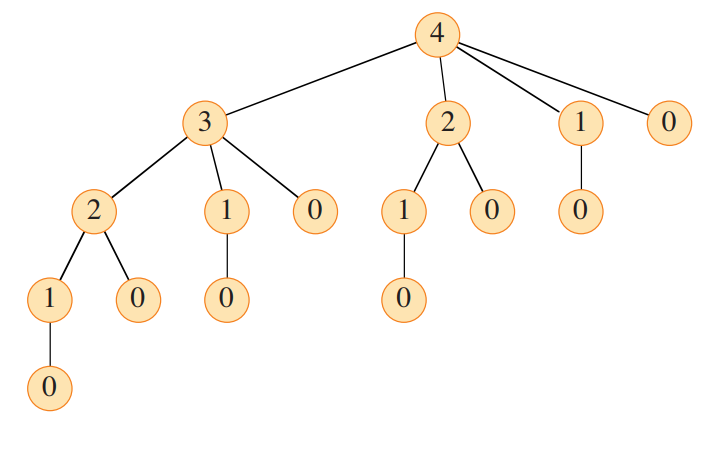

In [9]:
from IPython.display import Image
display(Image("img/rod_cut_recursion_tree.png", width=600))

Now instead of solving the same subproblem over and we can instead *store* the solution to a subproblem, in this case the optimal revenue one can get for a rod of length $n' < n$, in a hashtable and then when we come across that subproblem again we can retrieve this solution from the hashtable instead of recomputing a problem we've already solved.  This is called ***memoization*** and is the key distinction between dynamic programming versus divide & conquer approaches.

```{note}
:class: dropdown
Note this isn't a typo; it's actually spelled *memoization* and refers to the idea of memos since we store the value and look back at it later {cite:p}`cormen2022introduction`. In my opinion *memorization* would also work just as well since we are memorization the solution to a problem.
```

A more efficient version of the `naive_rod_cutting` algorithm, which utilizes memoization, is given below. This algorithm brings the time complexity from $O(2^n)$ to $O(n^2)$ so an exponential speedup! Although note that this comes with the cost of increasing the space complexity from $O(1)$ to $O(n)$ since we are storing a solution for each of the values of rod length that are $< n$.

In [4]:
def fast_rod_cutting(p, n, memo):
   if n in memo.keys(): # check memo to see if we've already solved this problem for this value of n
      max_rev = memo[n]
      return max_rev

   if n == 0: # if rod is length 0 terminate and get 0 revenue (recursive termination condition)
      return 0
    
   max_rev = float('-inf') # initially set revenue to lowest possible number
    
   for i in range(1, n+1): # loop over each possible first cut into two parts
      max_rev = max(max_rev, p[i] + fast_rod_cutting(p, n-i, memo))
   
   memo[n] = max_rev # save max revenue found for this value of n
    
   return max_rev

memo = {} # for memoization 
print(f"Max revenue for rod of length {n} is:", fast_rod_cutting(p, n, memo))

Max revenue for rod of length 25 is: 531


## $n$-th Fibonacci number

Here we'll go over a simpler example that demonstrates the power of dynamic programming: computing the $n$-th Fibonacci number.

The $n$-th Fibonacci number $F_n$ is defined as

$$
F_n = F_{n-1} + F_{n-2}
$$

where the $0$-th and $1$-st Fibonacci number are defined as $F_0=0$ and $F_1=1$ respectively. This has a clear, albeit naive, recursive implementation in code shown below.

In [5]:
"""
n: the n-th Fibonacci number desired
"""
def naive_fibonacci(n):
    if n == 0:
       return 0
    elif n == 1:
       return 1
    else:
       Fn = naive_fibonacci(n - 1) + naive_fibonacci(n - 2)
       return Fn
    
n = 40
print(f"{n}-th Fibonacci number is: {naive_fibonacci(n)}")

40-th Fibonacci number is: 102334155


The implementation is naive because of the of the two recursive calls `naive_fibonacci(n - 1)` and `naive_fibonacci(n - 2)`. For example when $n=10$ the first recursive call computes $F_9$ and the second recursive call computes $F_8$. However to compute $F_9$ the first recursive call is going to need to compute $F_8$ but wait, $F_8$ is already being computed by the *second* recursive call. This means we're doing double the work! We can get around this by *storing* the solutions to smaller Fibonacci problems in a hashtable/dict that we have already computed and when we need to compute them again we can simply look them 

In [6]:
def fast_fibonacci(n, memo):
    if n in memo.keys():
       return memo[n]
    if n == 0:
       return 0
    elif n == 1:
       return 1
    else:
       Fn = fast_fibonacci(n - 1, memo) + fast_fibonacci(n - 2, memo)
       memo[n] = Fn
       return Fn
    
memo = {} # for memoization 
print(f"{n}-th Fibonacci number is: {fast_fibonacci(n, memo)}")

40-th Fibonacci number is: 102334155


## Matrix multiplication  

Let's go over the second example of an application of dynamic programming from {cite:p}`cormen2022introduction`.

Ideas: divide series of products into two series of products and recursively find the best one?


## Practice problems

In [7]:
%load_ext watermark
%watermark -n -u -v -iv

Last updated: Mon Jul 15 2024

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 8.22.2

